<a href="https://colab.research.google.com/github/yk-Jeong/Kaggle-Studies/blob/main/8th_keras_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=utP3gh9DZI8

# 케라스 보스턴 주택 가격 모델

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data #keras dataset으로 존재
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model 

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수: 3~9 사이의 값(min=3, max=9, *범죄율과 스케일이 다름*)

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [3]:
tf.random.set_seed(42)
(X_train_full, y_train_full), (X_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                           test_split = 0.2, seed = 42)


### 데이터 확인

In [4]:
print("학습 데이터: {}\t레이블: {}".format(X_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(X_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


*(훈련데이터의 데이터/정답 레이블 첫 항목을 출력해본다)*

In [5]:
print(X_train_full[0])

[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
 8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
 9.0400e+00]


In [6]:
print(y_train_full[0]) #$1000 단위이므로 *1000 = $25,000

23.6


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [7]:
mean = np.mean(X_train_full, axis=0)
std = np.std(X_train_full, axis=0)

X_train_preprocessed = (X_train_full - mean) / std
X_test = (X_test - mean) / mean

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 42)

In [9]:
print("학습 데이터: {}\t레이블: {}".format(X_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(X_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(X_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(X_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


*feature가 13개인 것을 확인 가능*

### 모델 구성
- 학습 데이터가 매우 적은 경우, 모델의 깊이를 깊게 할수록 과대적합(Overfitting)이 일어날 확률이 높음

*따라서 학습 데이터가 적은 경우에는 모델의 깊이가 지나치게 깊지 않도록 쌓아줄 필요가 있음*

In [10]:
model = Sequential([Dense(100, activation = 'relu', input_shape=(13, ), name='dense1'),
                    Dense(64, activation = 'relu', name = 'dense2'),
                    Dense(32, activation = 'relu', name = 'dense3'),
                    Dense(1, name = 'output')]) #결과값은 단일하게 나오므로(주택가격은 회귀모형임) output을 1로 설정

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


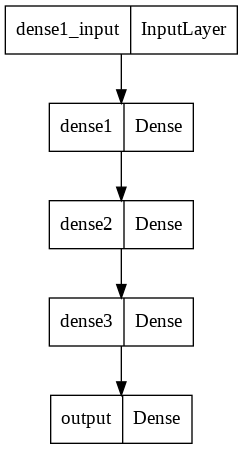

In [12]:
plot_model(model) #img로 확인할 수 있음

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [13]:
model.compile(loss = 'mse', #loss 손실함수는 mse
              optimizer = Adam(learning_rate = 1e-2),  #학습률을 왜 작은 값으로 두었을까 
              metrics = ['mae']) #metrics 평가지표는 mae인 것 유의

### 모델 학습

In [14]:
history = model.fit(X_train, y_train, epochs = 300,
                    validation_data = (X_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 75ms/step - loss: 332.3047 - mae: 15.4491 - val_loss: 133.5365 - val_mae: 9.1313
Epoch 2/300
9/9 [==============================] - 0s 22ms/step - loss: 60.8618 - mae: 5.7310 - val_loss: 25.2020 - val_mae: 3.7753
Epoch 3/300
9/9 [==============================] - 0s 23ms/step - loss: 35.3968 - mae: 4.2604 - val_loss: 16.4086 - val_mae: 3.0466
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 24.6020 - mae: 3.6390 - val_loss: 16.1057 - val_mae: 3.2028
Epoch 5/300
9/9 [==============================] - 0s 22ms/step - loss: 18.2131 - mae: 2.9817 - val_loss: 11.9416 - val_mae: 2.6269
Epoch 6/300
9/9 [==============================] - 0s 13ms/step - loss: 17.0607 - mae: 2.8739 - val_loss: 10.4458 - val_mae: 2.4590
Epoch 7/300
9/9 [==============================] - 0s 21ms/step - loss: 14.6051 - mae: 2.6869 - val_loss: 12.3845 - val_mae: 2.8966
Epoch 8/300
9/9 [==============================] - 0s 15ms/step - loss: 1

### 모델 평가 
- `evaluate()`

In [15]:
model.evaluate(X_test, y_test) #test data로 평가한 결과 

4/4 [==============================] - 0s 3ms/step - loss: 153.1572 - mae: 9.3972


[153.15721130371094, 9.397208213806152]

In [16]:
print(history.history.keys()) #.history.keys를 처음 보는데요 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


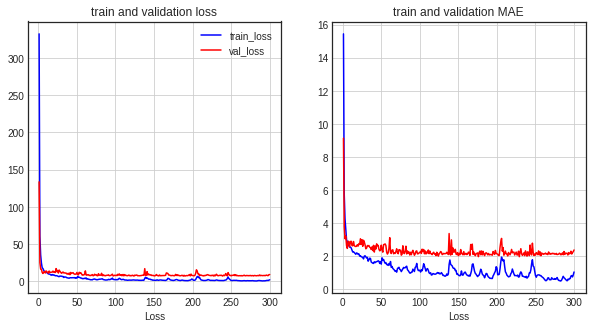

In [17]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1) #위에서 epoch을 바꾸어도 문제가 되지 않게 하기 위해 이렇게 관리 
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1) #왼쪽: (1, 2)로 분리한 다음 1
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('train and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_xlabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2) #오른쪽: (1, 2)로 분리한 다음 2
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'red', label = 'val_mae')
ax2.set_title('train and validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_xlabel('Loss')
ax2.grid()
ax1.legend()

plt.show()

양쪽 모두 특정 시점에서 급격히 감소한 뒤 큰 변동이 없는 것을 알 수 있음 

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에 [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합(underfitting)이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [18]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from sklearn.model_selection import KFold

In [19]:
tf.random.set_seed(42)
(X_train_full, y_train_full), (X_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                           test_split = 0.2, seed = 42)

mean = np.mean(X_train_full, axis=0)
std = np.std(X_train_full, axis=0)

X_train_preprocessed = (X_train_full - mean) / std
X_test = (X_test - mean) / mean

#앞의 코드를 다시 가져오자 : 위와 다른 점은 validation을 따로 구분하지 않는다는 것 

In [20]:
k = 3
kfold = KFold(n_splits = k, shuffle = True, random_state = 42)

In [24]:
def build_model():
  input = Input(shape = (13, ), name = 'input')
  hidden1 = Dense(100, activation = 'relu', name = 'dense1')(input)
  hidden2 = Dense(64, activation = 'relu', name = 'dense2')(hidden1)
  hidden3 = Dense(32, activation = 'relu', name = 'dense3')(hidden2)
  output = Dense(1, name = 'output')(hidden3)

  model1 = Model(inputs = [input], outputs = output)
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = ['mae'])
  return model

In [25]:
#이거 왜 한다고? : k번 순회해 그만큼의 지표값이 나오므로, 그 값으로 mean을 취하거나 할 것이므로 
mae_list = []

In [26]:
for train_idx, val_idx in kfold.split(X_train):
  X_train_fold, X_val_fold = X_train_preprocessed[train_idx], X_train_preprocessed[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx] 

  #Q.이거 유튜브 댓글에는 X_train_preprocessed에서 받아와야 한다는 분이 계시던데 
  #그거 이미 X_train으로 적용되지 않았나? 
  #A. 데이터 새로 끌고왔음.... 
  #X_train_full로 원본 가져오라는 사람도 있는데
  #이것도 잘 이해 안 됨 

  model = build_model()
  model.fit(X_train_fold, y_train_fold, epochs = 300, 
            validation_data = (X_val_fold, y_val_fold)) 
  
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 2s 173ms/step - loss: 0.8098 - mae: 0.5817 - val_loss: 0.7959 - val_mae: 0.6390
Epoch 2/300
6/6 [==============================] - 0s 17ms/step - loss: 0.5580 - mae: 0.5288 - val_loss: 0.5649 - val_mae: 0.5241
Epoch 3/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3698 - mae: 0.4401 - val_loss: 0.4267 - val_mae: 0.4906
Epoch 4/300
6/6 [==============================] - 0s 29ms/step - loss: 0.2385 - mae: 0.3515 - val_loss: 0.3287 - val_mae: 0.4024
Epoch 5/300
6/6 [==============================] - 0s 16ms/step - loss: 0.2123 - mae: 0.3238 - val_loss: 0.2813 - val_mae: 0.3917
Epoch 6/300
6/6 [==============================] - 0s 22ms/step - loss: 0.1722 - mae: 0.2878 - val_loss: 0.2086 - val_mae: 0.3022
Epoch 7/300
6/6 [==============================] - 0s 16ms/step - loss: 0.1596 - mae: 0.2784 - val_loss: 0.1974 - val_mae: 0.3183
Epoch 8/300
6/6 [==============================] - 0s 15ms/step - loss: 0.1311 - mae: 0.2

kfold = 3, epochs = 300 이므로 총 900번 학습되나, 데이터의 양이 적으므로 빠르게 학습됨 

In [27]:
print(mae_list)

[10.676519393920898, 10.251677513122559, 9.997797012329102]


쩐쨍님 저는 뭐 말도 안되는 mae 숫자가 나오는데요 

-> mse/mae 바꿔 써서인 듯... 원래대로 고치니까 맞게 잘 나옴 

In [28]:
print(np.mean(mae_list))

10.308664639790853
